<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---
# **Tarefa** | Extração dos projetos em destaque do GitHub
---

# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

O [GitHub](https://github.com/) é o maior repositória de código aberto na internet. Nele, você pode encontrar o código fonte de diversos projetos, alguns inclusive utilizamos em nossas aulas, como o [Pandas](https://github.com/pandas-dev/pandas). O GitHub apresenta uma página de projetos em destaque, que são os projetos que estão recebendo muita atenção da comunidade:

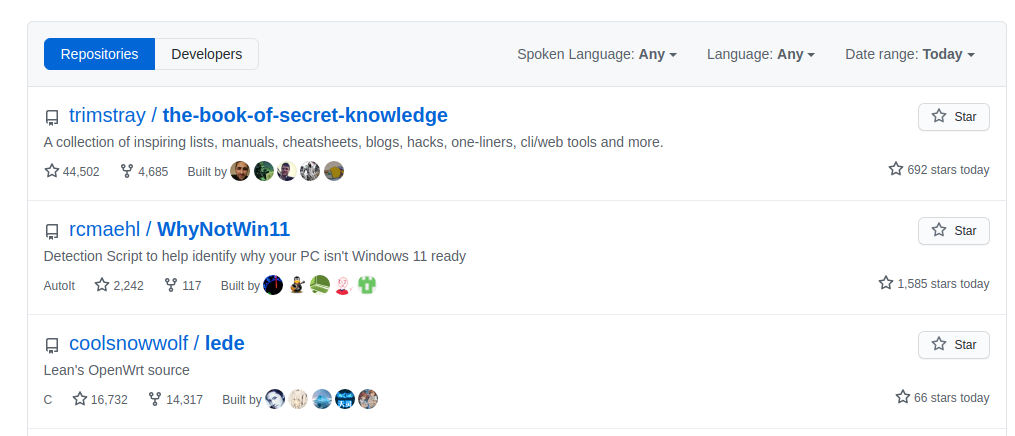

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os projetos mais populares do GitHub, este é o link:

```
https://github.com/trending
```

Escreva os dados extraídos no arquivo csv `github.csv

## Métodos de extração (Web Crawling):

#### Método 1:

Importações:

*   **requests:** Biblioteca para fazer requisições HTTP em Python.
*   **HTTPError:** Exceção específica para erros HTTP na biblioteca requests.

<br>

Definição da Função:


*   **crawl_website(url: str) -> str:** Define uma função que recebe uma URL como string e retorna o conteúdo da resposta como string.
Tentativa de Requisição:
*   **resposta = requests.get(url=URL, headers=HEADERS):** Faz uma requisição HTTP GET para a URL fornecida com os cabeçalhos especificados em HEADERS.

<br>

Tratamento de Exceções:


*   **except HTTPError as exc**: Captura qualquer erro HTTP que possa ocorrer durante a requisição.
*   **print(exc):** Imprime o erro.
*   **return " ":** Retorna uma string vazia em caso de erro.

Retorno da Resposta:

return resposta.text: Retorna o conteúdo da resposta HTTP como string.

In [1]:
# Capturando a pagina na web
  # Aqui foi criado uma função "crawl_website"

import requests
from requests.exceptions import HTTPError

def crawl_website(url: str) -> str:
  try:
    resposta = requests.get(url=URL, headers=HEADERS)
  except HTTPError as exc:
    print(exc)
  return resposta.text

In [2]:
# Caso o retorno da extração fique em outra lingua, alterar dentro da função:

def crawl_website(url: str) -> str:
  try:
    headers = {"Accept-Language": "en-US,en;q=0.5"}
    params = dict(lang='en-US,en;q=0.5')
    resposta = requests.get(url=URL, headers = headers, params= params)
    resposta.raise_for_status()
  except HTTPError as exc:
    print(exc)
  else:
    return resposta.text

A função crawl_website faz uma requisição HTTP GET para a URL especificada, utilizando cabeçalhos personalizados.
Trata exceções HTTP e retorna o conteúdo da resposta como string.
A URL e cabeçalhos são definidos fora da função e passados como argumentos.
Este método é útil para capturar páginas web e processar seu conteúdo, lidando adequadamente com erros HTTP e permitindo a personalização da requisição através de cabeçalhos e parâmetros.

In [3]:
URL = 'https://github.com/trending'
HEADERS = {'User-Agent': 'MeuUser-Agent'}

conteudo = None
conteudo = crawl_website(url=URL)

In [4]:
# Utilizando o pacote beautifulsoup4 para carregar a variavel conteudo:

from bs4 import BeautifulSoup

pagina = BeautifulSoup(conteudo, 'html.parser')

#### Método 2:


*   Importa a biblioteca 'requests' para realizar requisições HTTP a sites
*   Importa a biblioteca 'BeautifulSoup' para analisar o HTML de páginas web.
*   Faz uma requisição HTTP para obter o conteúdo da página de repositórios em alta do GitHub.
*   Armazena o conteúdo da página (HTML) em uma variável chamada conteudo.
*   Cria um objeto BeautifulSoup para analisar a estrutura do HTML da página. O segundo argumento 'html.parser' indica qual parser HTML deve ser usado.

In [74]:
# Solução do exercício 2

import requests  
from bs4 import BeautifulSoup  

requisicao = requests.get('https://github.com/trending')  
conteudo = requisicao.content  
github_trending = BeautifulSoup(conteudo, 'html.parser')  

## Web Scrapping:

#### Método 1:

Primeiramente, extrai os trechos que contem o nome do projeto:


*   projetos_git = pagina.find_all('h2', class_="h3 lh-condensed"): Encontra todas as tags < h 2 > com a classe "h3 lh-condensed" na página.
*   Para cada elemento existente na pagina, a função **get_text(strip=True)** é usada para obter o texto sem as tags, removendo espaços em branco no início e no fim.
*   split(sep='/')[1]: No github os projetos aparecem como: Nome do autor/ Nome do projeto, como o texto é dividido pelo caractere '/' selecionei o segundo elemento da lista resultante.
*   O texto extraído é adicionado à lista projetos.

In [5]:
# Extrair projeto

projetos_git = pagina.find_all('h2', class_="h3 lh-condensed")

projetos = []

for projeto in projetos_git[:15]:
  projeto_extraido = projeto.get_text(strip = True).split(sep= '/')[1]
  projetos.append(projeto_extraido)

for projeto in projetos:
  print(projeto)

Omost
gpt-computer-assistant
Scrapegraph-ai
webx
ToonCrafter
IsaacLab
generative-ai-for-beginners
LLMs-from-scratch
MiniCPM-V
marker
Rust
Python-100-Days
nuclei-templates
my-tv
HowToCook


Agora, tentei extrair os trechos de linguagem.


*   **linguagem_git = pagina.find_all('span', class_='d-inline-block ml-0 mr-3'):** Encontra todas as tags < span > com a classe d-inline-block ml-0 mr-3 na página pagina.

Pensei em extrair os elementos individualmente, porém no trecho de linguagem, se ela for inexistente, o código ignora e pula pra o próximo.
Isso leva a uma extração com erros nos dados, porque a linguagem presente na lista pode não estar relacionada ao projeto.

Só é possivel visualizar este caso em dias que as trendings do github apresentam artigos com linguagem inexistente.

In [6]:
# Extrair linguagem

linguagem_git = pagina.find_all('span', class_='d-inline-block ml-0 mr-3')
linguagens = []

for linguagem in linguagem_git[:15]:
  linguagem_extraida = linguagem.get_text(strip = True)
  linguagens.append(linguagem_extraida)

for elementos in linguagens:
  print(elementos)

Python
Python
Python
Rust
Python
Python
Jupyter Notebook
Jupyter Notebook
Python
Python
Rust
Python
JavaScript
C
Dockerfile


In [7]:
linguagens = []

linguagem_git = pagina.find_all('span', class_='d-inline-block ml-0 mr-3')
for linguagem in linguagem_git[:15]:
  if linguagem:
    linguagem_extraida = linguagem.get_text(strip = True)
  else:
    linguagem_extraida = 'Nan'
  linguagens.append(linguagem_extraida)

for elementos in linguagens:
  print(elementos)

 # Mesmo com a condicional if, não consegui extrair o trecho de forma certa.

Python
Python
Python
Rust
Python
Python
Jupyter Notebook
Jupyter Notebook
Python
Python
Rust
Python
JavaScript
C
Dockerfile


O trecho **legendas_git = pagina.find_all('div', class_="f6 color-fg-muted mt-2")** encontra todas as tags < div > com a classe f6 color-fg-muted mt-2 na página pagina, que representam a linguagem, estrelas, estrelas diarias e forks

In [8]:
legendas_git = pagina.find_all('div', class_="f6 color-fg-muted mt-2")

Para cada elemento em **legendas_git, a função get_text(' ; ', strip=True).split(sep=';')** é usada para obter o texto, removendo espaços em branco e dividindo o texto por ' ; '.
O texto extraído é adicionado à lista legendas.

Se um dos 15 artigos fatiados não tiver o elemento linguagem, é possivel notar que teremos indices com menos elementos e isto resultará em erro para a elaboração do arquivo csv. 

In [9]:
legendas = []

for legenda in legendas_git[:15]:
  legenda_extraida = legenda.get_text(';', strip='True').split(sep=';')
  legendas.append(legenda_extraida)

for elemento in legendas:
  print(elemento)

['Python', '4,119', '233', 'Built by', '1,697 stars today']
['Python', '1,295', '107', 'Built by', '138 stars today']
['Python', '10,090', '772', 'Built by', '248 stars today']
['Rust', '1,086', '101', 'Built by', '420 stars today']
['Python', '3,159', '253', 'Built by', '1,360 stars today']
['Python', '1,054', '316', 'Built by', '39 stars today']
['Jupyter Notebook', '44,780', '25,046', 'Built by', '114 stars today']
['Jupyter Notebook', '17,922', '1,667', 'Built by', '238 stars today']
['Python', '5,210', '370', 'Built by', '517 stars today']
['Python', '10,693', '518', 'Built by', '576 stars today']
['Rust', '20,813', '2,028', 'Built by', '40 stars today']
['Python', '151,082', '51,460', 'Built by', '99 stars today']
['JavaScript', '8,217', '2,371', 'Built by', '10 stars today']
['C', '27,331', '3,070', 'Built by', '150 stars today']
['Dockerfile', '60,658', '8,283', 'Built by', '33 stars today']


Para contornar este erro, foi utilizado uma condicional onde:



*   Para cada elemento na lista legendas, o tamanho é verificado. Se o tamanho não for igual a 5, insere 'Nan' no início da lista.
*   Remove o quarto elemento (índice 3 - 'Builty by') de cada lista elemento em legendas.



In [10]:
legendas = []

for legenda in legendas_git[:15]:
  legenda_extraida = legenda.get_text(';', strip='True').split(sep=';')
  legendas.append(legenda_extraida)

for elemento in legendas:
  tamanho = len(elemento)
  if tamanho != 5:
    elemento.insert(0, 'Nan')

for elemento in legendas:
  elemento.pop(3)
  print(elemento)

['Python', '4,119', '233', '1,697 stars today']
['Python', '1,295', '107', '138 stars today']
['Python', '10,090', '772', '248 stars today']
['Rust', '1,086', '101', '420 stars today']
['Python', '3,159', '253', '1,360 stars today']
['Python', '1,054', '316', '39 stars today']
['Jupyter Notebook', '44,780', '25,046', '114 stars today']
['Jupyter Notebook', '17,922', '1,667', '238 stars today']
['Python', '5,210', '370', '517 stars today']
['Python', '10,693', '518', '576 stars today']
['Rust', '20,813', '2,028', '40 stars today']
['Python', '151,082', '51,460', '99 stars today']
['JavaScript', '8,217', '2,371', '10 stars today']
['C', '27,331', '3,070', '150 stars today']
['Dockerfile', '60,658', '8,283', '33 stars today']


Concatenou-se as listas Projetos com Legendas:



*   Para cada projeto, insere o projeto correspondente no índice 0 da lista legendas.

Impressão das Legendas Atualizadas:

Cada lista em legendas é impressa com o projeto adicionado no início.

<br>

O código extrai informações de uma página web, dividindo as informações em projetos, linguagens e legendas.
As listas resultantes são processadas para garantir que cada entrada tenha o formato desejado.
Finalmente, as listas são concatenadas, associando cada projeto às suas respectivas legendas.

In [11]:
for i in range(len(projetos)):
    concatenacao = legendas[i].insert(0, projetos[i])

# Print das legendas atualizadas
for elemento in legendas:
    print(elemento)

['Omost', 'Python', '4,119', '233', '1,697 stars today']
['gpt-computer-assistant', 'Python', '1,295', '107', '138 stars today']
['Scrapegraph-ai', 'Python', '10,090', '772', '248 stars today']
['webx', 'Rust', '1,086', '101', '420 stars today']
['ToonCrafter', 'Python', '3,159', '253', '1,360 stars today']
['IsaacLab', 'Python', '1,054', '316', '39 stars today']
['generative-ai-for-beginners', 'Jupyter Notebook', '44,780', '25,046', '114 stars today']
['LLMs-from-scratch', 'Jupyter Notebook', '17,922', '1,667', '238 stars today']
['MiniCPM-V', 'Python', '5,210', '370', '517 stars today']
['marker', 'Python', '10,693', '518', '576 stars today']
['Rust', 'Rust', '20,813', '2,028', '40 stars today']
['Python-100-Days', 'Python', '151,082', '51,460', '99 stars today']
['nuclei-templates', 'JavaScript', '8,217', '2,371', '10 stars today']
['my-tv', 'C', '27,331', '3,070', '150 stars today']
['HowToCook', 'Dockerfile', '60,658', '8,283', '33 stars today']


Por fim, os dados extraidos são escritos em um arquivo no formato CSV

# Agora há dois métodos para escrever estas informações em um arquivo CSV:

In [13]:
# Escreva os dados extraídos no arquivo csv `github.csv`

import csv
with open(file='github.csv', mode='w', encoding='utf8') as fp:
  escritor_csv = csv.writer(fp, delimiter=',')
  escritor_csv.writerows([['projetos', 'linguagem', 'estrelas', 'forks', 'estrelas_diarias']] + legendas)

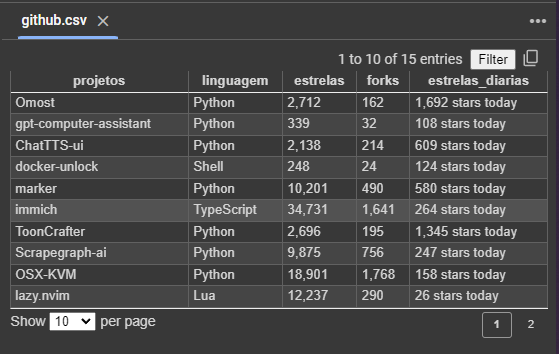

Nesta segunda forma, irei trabalhar com o Pandas para formatar as informações limpando a coluna de stars today, convertendo colunas que contem números porem são categóricas. Esta manipulação será realizada somente neste trecho para fins didáticos


In [14]:
import pandas as pd 

df_raw = pd.DataFrame(legendas, columns=['projetos', 'linguagem', 'estrelas', 'forks', 'estrelas_diarias'])
df_raw

,projetos,linguagem,estrelas,forks,estrelas_diarias
0,Omost,Python,"4,119",233,"1,697 stars today"
1,gpt-computer-assistant,Python,"1,295",107,138 stars today
2,Scrapegraph-ai,Python,"10,090",772,248 stars today
3,webx,Rust,"1,086",101,420 stars today
4,ToonCrafter,Python,"3,159",253,"1,360 stars today"
5,IsaacLab,Python,"1,054",316,39 stars today
6,generative-ai-for-beginners,Jupyter Notebook,"44,780","25,046",114 stars today
7,LLMs-from-scratch,Jupyter Notebook,"17,922","1,667",238 stars today
8,MiniCPM-V,Python,"5,210",370,517 stars today
9,marker,Python,"10,693",518,576 stars today


In [71]:
# Tratamento da coluna de estrelas diarias

df_treated = df_raw.copy()
df_treated['estrelas_diarias'] = df_treated['estrelas_diarias'].str.replace('stars today', '').str.replace(',', '').astype(int) # AStype converte para numerico
df_treated

,projetos,linguagem,estrelas,forks,estrelas_diarias
0,Omost,Python,"4,119",233,1697
1,gpt-computer-assistant,Python,"1,295",107,138
2,Scrapegraph-ai,Python,"10,090",772,248
3,webx,Rust,"1,086",101,420
4,ToonCrafter,Python,"3,159",253,1360
5,IsaacLab,Python,"1,054",316,39
6,generative-ai-for-beginners,Jupyter Notebook,"44,780","25,046",114
7,LLMs-from-scratch,Jupyter Notebook,"17,922","1,667",238
8,MiniCPM-V,Python,"5,210",370,517
9,marker,Python,"10,693",518,576


In [63]:
df_treated[['estrelas', 'forks']] = df_treated[['estrelas', 'forks']].apply(lambda x: x.str.replace(',', ''))
df_treated[['estrelas', 'forks']] = df_treated[['estrelas', 'forks']].apply(pd.to_numeric) #Converte para valor numerico
df_treated

,projetos,linguagem,estrelas,forks,estrelas_diarias
0,Omost,Python,4119,233,1697
1,gpt-computer-assistant,Python,1295,107,138
2,Scrapegraph-ai,Python,10090,772,248
3,webx,Rust,1086,101,420
4,ToonCrafter,Python,3159,253,1360
5,IsaacLab,Python,1054,316,39
6,generative-ai-for-beginners,Jupyter Notebook,44780,25046,114
7,LLMs-from-scratch,Jupyter Notebook,17922,1667,238
8,MiniCPM-V,Python,5210,370,517
9,marker,Python,10693,518,576


In [69]:

# Outras formas:
    # Salvar colunas selecionadas em uma variavel

# Lista das colunas que precisam de tratamento
columns_to_treat = ['estrelas', 'forks']

# Removendo vírgulas das colunas especificadas
df_treated[columns_to_treat] = df_treated[columns_to_treat].apply(lambda x: x.str.replace(',', ''))

# Se as colunas são numéricas, você pode converter para o tipo apropriado após remover as vírgulas
df_treated[columns_to_treat] = df_treated[columns_to_treat].apply(pd.to_numeric)

df_treated

,projetos,linguagem,estrelas,forks,estrelas_diarias
0,Omost,Python,4119,233,1697
1,gpt-computer-assistant,Python,1295,107,138
2,Scrapegraph-ai,Python,10090,772,248
3,webx,Rust,1086,101,420
4,ToonCrafter,Python,3159,253,1360
5,IsaacLab,Python,1054,316,39
6,generative-ai-for-beginners,Jupyter Notebook,44780,25046,114
7,LLMs-from-scratch,Jupyter Notebook,17922,1667,238
8,MiniCPM-V,Python,5210,370,517
9,marker,Python,10693,518,576


In [72]:
df_treated[['estrelas', 'forks']] = df_treated[['estrelas', 'forks']].applymap(lambda x: int(x.replace(',', '')))
df_treated

C:\Users\Micro\AppData\Local\Temp\ipykernel_11060\4294422607.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_treated[['estrelas', 'forks']] = df_treated[['estrelas', 'forks']].applymap(lambda x: int(x.replace(',', '')))


,projetos,linguagem,estrelas,forks,estrelas_diarias
0,Omost,Python,4119,233,1697
1,gpt-computer-assistant,Python,1295,107,138
2,Scrapegraph-ai,Python,10090,772,248
3,webx,Rust,1086,101,420
4,ToonCrafter,Python,3159,253,1360
5,IsaacLab,Python,1054,316,39
6,generative-ai-for-beginners,Jupyter Notebook,44780,25046,114
7,LLMs-from-scratch,Jupyter Notebook,17922,1667,238
8,MiniCPM-V,Python,5210,370,517
9,marker,Python,10693,518,576


In [58]:
df_treated.dtypes

projetos            object
linguagem           object
estrelas             int64
forks                int64
estrelas_diarias     int32
dtype: object

Por fim, com o DataFrame tratado, finalizar usando a função to_csv

In [78]:
df_treated.to_csv('github4.csv', index=False)

#### Método 2:

In [75]:
projetos = github_trending.find_all('article', attrs={'class': 'Box-row'}) #extrai todos os repositórios em alta da página de tendências do GitHub e os armazena na variável projetos


In [77]:
extracao_do_github = []
for c in projetos:

    # Nome dos projetos
    nome_projeto = c.find('h2', class_='h3 lh-condensed').text.strip().replace('\n', '')
    nome_projeto = nome_projeto.split(sep= '/')[1].strip()

    # Quantidade total de estrelas
    total_estrelas = c.find('a', class_='Link Link--muted d-inline-block mr-3').text.strip()

    # Classificação das estrelas do dia.
    estrelas_dia = c.find('span', class_='d-inline-block float-sm-right').text.strip().split()[0]

    # Forks
    compartilhamento = c.find_all('a', class_='Link Link--muted d-inline-block mr-3')[-1].text.strip()

    # Linguagem do projeto
    linguagem_elem = c.find('span', class_='d-inline-block ml-0 mr-3')
    linguagem = linguagem_elem.text.strip() if linguagem_elem else 'Nan' # Se não houver linguagem naquele projeto escrever "nan"

    # Transferir dados para a lista extracao_do_github
    extracao_do_github.append([nome_projeto, total_estrelas, estrelas_dia, compartilhamento, linguagem])

print(extracao_do_github)

[['Omost', '4,163', '1,697', '245', 'Python'], ['gpt-computer-assistant', '1,336', '138', '112', 'Python'], ['Scrapegraph-ai', '10,101', '248', '774', 'Python'], ['webx', '1,097', '420', '101', 'Rust'], ['ToonCrafter', '3,173', '1,360', '256', 'Python'], ['IsaacLab', '1,059', '39', '318', 'Python'], ['generative-ai-for-beginners', '44,788', '114', '25,047', 'Jupyter Notebook'], ['LLMs-from-scratch', '17,933', '238', '1,668', 'Jupyter Notebook'], ['MiniCPM-V', '5,236', '517', '371', 'Python'], ['marker', '10,705', '576', '518', 'Python'], ['Rust', '20,817', '40', '2,028', 'Rust'], ['Python-100-Days', '151,089', '99', '51,461', 'Python'], ['nuclei-templates', '8,219', '10', '2,371', 'JavaScript'], ['my-tv', '27,334', '150', '3,070', 'C'], ['HowToCook', '60,667', '33', '8,284', 'Dockerfile'], ['KawaiiLogos', '2,647', '191', '79', 'Nan'], ['syncthing', '60,689', '82', '4,071', 'Go'], ['bento', '507', '145', '26', 'Go'], ['renovate', '16,192', '17', '2,079', 'TypeScript'], ['nuclei', '17,67

In [16]:
# Como o arquivo ja esta no formato adequado, será convertido em um DataFrame

import pandas as pd

github_df = pd.DataFrame(extracao_do_github, columns=['projetos', 'stars', 'stars_today', 'forks', 'language'])
github_df.head(n=15)

,projetos,stars,stars_today,forks,language
0,Omost,"2,956","1,692",175,Python
1,gpt-computer-assistant,502,108,39,Python
2,ChatTTS-ui,"2,187",609,221,Python
3,docker-unlock,256,124,24,Shell
4,marker,"10,286",580,497,Python
5,immich,"34,784",264,"1,645",TypeScript
6,ToonCrafter,"2,766","1,345",204,Python
7,Scrapegraph-ai,"9,917",247,758,Python
8,OSX-KVM,"18,917",158,"1,768",Python
9,lazy.nvim,"12,248",26,290,Lua


In [17]:
# Escrever dataframe em um arquivo CSV
  # Foi utilizado a função to_csv()

github_df.to_csv('github2.csv', index=False)

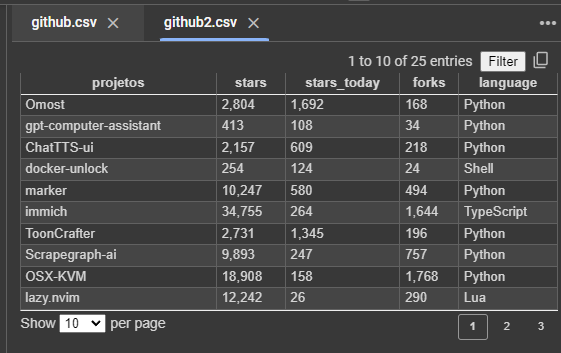

Apenas mais um método de escrita de arquivo CSV:

In [18]:
import csv

# Escreva os dados extraídos no arquivo csv `github.csv`

with open(file='github3.csv', mode='w', encoding='utf8') as fp:
  escritor_csv = csv.writer(fp, delimiter=',')
  escritor_csv.writerows([['projetos', 'linguagem', 'estrelas', 'forks', 'estrelas_diarias']] + legendas)

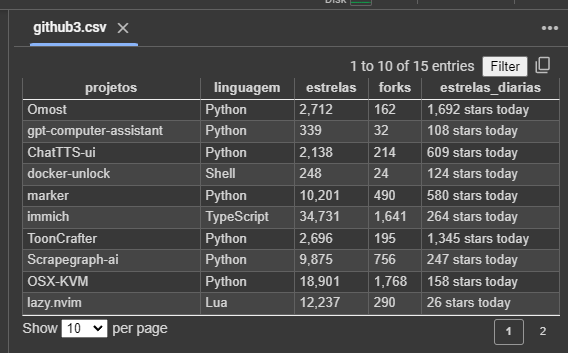